# Demonstration of the Application Programming Interface (API) of SLAMpy
## Setting up a Scenario

Initialise a Scenario by providing a name (to identify it in the output geodatabase), a region (a feature class providing the geographical location to work on), a nutrient (either N or P, for nitrogen or phosphorus, respectively), the sort field in the region (which will be the level of granularity at which outputs will be produced). Optionally, a selection as an SQL query can be provided to work on a subspace in the region, and an overwrite option also exists (default value is True) to allow ArcGIS to overwrite existing feature classes in the output geodatabase (it can be turned off by setting it to False).

In [1]:
import SLAMpy

# define the location of the input geodatabase, input folder, and output geodatabase
in_gdb = '~/SLAMpy/SLAMpy/in/input.gdb'
in_fld = '~/SLAMpy/SLAMpy/in'
out_gdb = '~/SLAMpy/SLAMpy/out/output.gdb'

# initialise a Scenario (version 3)
scenario = SLAMpy.ScenarioV3(
    name='my_scenario',
    nutrient='N',  # N or P
    region=in_gdb + '/_MyRegion',  # location of the feature class to use
    sort_field='EU_CD',  # field name in region feature class used to determine output spatial granularity
    selection=None,  # could use an SQL query here
    overwrite=True  # whether overwriting files in the geodatabase is permitted
)

## Running a Scenario from scratch

If a Scenario is run from scratch, the location of the input datasets for the given version of the Scenario (version 3 here) must be provided.

In [2]:
scenario.run(
    out_gdb=out_gdb,
    # inputs for agriculture tool
    in_arable=in_gdb + '/PathwaysCCT_IRL_Arable_LPIS',
    in_pasture=in_gdb + '/PathwaysCCT_IRL_Pasture_LPIS',
    # inputs for atmospheric deposition tool
    in_atm_depo=in_gdb + '/AtmosDep_Lakes',
    # inputs for forestry, peat, diffuse urban tools
    in_land_cover=in_gdb + '/clc12_IE',
    in_lc_field='CODE_12',
    in_factors=in_fld + '/LAM_Factors.xlsx' + '/Corine_N$',
    # inputs for industrial discharges tool
    in_ipc=in_gdb + '/IPPC_Loads_LAM2',
    in_sect4=in_gdb + '/Section4Discharges_D07_IsMain',
    # inputs for domestic septic tank discharges tool
    in_dwts=in_gdb + '/SepticTankSystems_LoadModel17',
    # inputs for municipal wastewater discharges tool
    in_agglo=in_gdb + '/SLAM_Agglom15_March17_IsMain',
    in_treated_field='PointT{}',
    in_overflow_field='T{}_SWO'
)

> Calculating N load for Arable.
> Calculating N load for Pasture.
> Calculating N load for Atmospheric Deposition.
> Calculating N load for Forestry.
> Calculating N load for Peat.
> Calculating N load for Urban.
> Calculating N load for IPC Industries.
> Calculating N load for Section 4 Industries.
> Calculating N load for Septic Tank Systems.
> Calculating N load for Wastewater Treatment Plants.
> Calculating summary loads for all sources of N.
> Creating output feature class to store load apportionment for N.
> Gathering all sources of N in output feature class.
> Calculating N loads totals and sub-totals.


## Reloading a Scenario from a previous run

If a Scenario was already run, its output feature classes are available in the output geodatabase. By providing the location of the existing output feature classes, one can reach the same outcome as if the Scenario was run from scratch (as described above). Note, the same version of the Scenario that was used to run the Scenario in the first place must be used to reload the Scenario.

In [3]:
scenario.run(
    out_gdb=out_gdb,
    # existing outputs from agriculture tool
    ex_arable=out_gdb + '/scenario_N_Arable',
    ex_pasture=out_gdb +'/scenario_N_Pasture',
    # existing output from atmospheric deposition tool
    ex_atm_depo=out_gdb + '/scenario_N_AtmDepo',
    # existing output from forestry tool
    ex_forest=out_gdb + '/scenario_N_Forestry',
    # existing output from peat tool
    ex_peat=out_gdb + '/scenario_N_Peat',
    # existing output from diffuse urban tool
    ex_urban=out_gdb + '/scenario_N_Urban',
    # existing output from industrial discharges tool
    ex_ipc=out_gdb + '/scenario_N_IndustryIPC',
    ex_sect4=out_gdb + '/scenario_N_IndustrySect4',
    # existing output from domestic septic tank discharges tool
    ex_dwts=out_gdb + '/scenario_N_SepticTanks',
    # existing output from municipal wastewater discharges tool
    ex_agglo=out_gdb + '/scenario_N_Wastewater'
)

> Reusing existing data for arable and pasture.
> Reusing existing data for atmospheric deposition.
> Reusing existing data for forestry.
> Reusing existing data for peatlands.
> Reusing existing data for diffuse urban.
> Reusing existing data for IPC and Section 4 industries.
> Reusing existing data for septic tanks.
> Reusing existing data for WWTPs.
> Calculating summary loads for all sources of N.
> Creating output feature class to store load apportionment for N.
> Gathering all sources of N in output feature class.
> Calculating N loads totals and sub-totals.


## Running only certain sources of a Scenario from scratch, reloading the others

If only some sources need to be re-run, it is possible to mix-and-match newly run sources, with existing sources for the others. Note, some sources are generated by the same geoprocessing tool (e.g. agriculture tool for pasture and arable, industry tool for IPC and Sect4), which implies that these related sources must be either both used from existing outputs or both freshly run. If any source related to other sources (i.e produced through the same geoprocessing tool) is not provided from an existing output, SLAMpy will automatically re-run all related sources by calling the relevant geoprocessing tool.

In [4]:
scenario.run(
    out_gdb=out_gdb,
    # inputs for agriculture tool
    in_arable=in_gdb + '/PathwaysCCT_IRL_Arable_LPIS',
    in_pasture=in_gdb + '/PathwaysCCT_IRL_Pasture_LPIS',
    # existing output from atmospheric deposition tool
    ex_atm_depo=out_gdb + '/scenario_N_AtmDepo',
    # existing output from forestry tool
    ex_forest=out_gdb + '/scenario_N_Forestry',
    # existing output from peat tool
    ex_peat=out_gdb + '/scenario_N_Peat',
    # existing output from diffuse urban tool
    ex_urban=out_gdb + '/scenario_N_Urban',
    # existing output from industrial discharges tool
    ex_ipc=out_gdb + '/scenario_N_IndustryIPC',
    ex_sect4=out_gdb + '/scenario_N_IndustrySect4',
    # existing output from domestic septic tank discharges tool
    ex_dwts=out_gdb + '/scenario_N_SepticTanks',
    # existing output from municipal wastewater discharges tool
    ex_agglo=out_gdb + '/scenario_N_Wastewater'
)

> Calculating N load for Arable.
> Calculating N load for Pasture.
> Reusing existing data for atmospheric deposition.
> Reusing existing data for forestry.
> Reusing existing data for peatlands.
> Reusing existing data for diffuse urban.
> Reusing existing data for IPC and Section 4 industries.
> Reusing existing data for septic tanks.
> Reusing existing data for WWTPs.
> Calculating summary loads for all sources of N.
> Creating output feature class to store load apportionment for N.
> Gathering all sources of N in output feature class.
> Calculating N loads totals and sub-totals.


## Spatial subset of a Scenario

If an existing Scenario is composed of several spatial units (i.e. basins, sub-basins, etc.), it is possible to obtain a subset Scenario from it without requiring any ArcMap geoprocessing tool, just use the relevant constructor method, as follows:

In [5]:
subset = SLAMpy.Scenario.from_subset_in_existing_scenario(
    existing_scenario=scenario,  # Scenario object from which to draw a subset
    basin_subset_list=["IE_EA_09B030100", "IE_EA_09C040100"],  # list of basins to extract from existing scenario
    new_name='subset'  # name for the new scenario
)

Note, the subset is also a Scenario object in its own right, so all functionalities described below are applicable to it as well.

## Saving a Scenario in a CSV file

The outputs of a Scenario can be saved into a CSV file. This file can be used to store the results of the run of Scenario for reloading it in the future, or for doing some postprocessing or plotting outside of Python. The name of the file written is standardised, if it is to be reloaded into Python, the file should not be renamed.

In [6]:
scenario.write_to_csv(output_location='.')  # this will save the scneario in the current working directory

## Reloading a Scenario from a CSV file

If the Scenario was saved as a CSV file following the procedure described above, and if the file was not renamed, it can be easily used to re-generate a Scenario object to be used in Python.

In [7]:
scenario = SLAMpy.Scenario.read_from_csv(file_path='./scenario.N.csv')

## Plotting a given Scenario

If SLAMpy is used in a Jupyter notebook, one needs to make sure the figures are plotted in the notebook, by using the following command. If SLAMpy is not used in a Jupyter notebook, this command is to be ignored.

In [8]:
%matplotlib inline

Use the relevant Scenario method to plot the total loads as a donut plot.

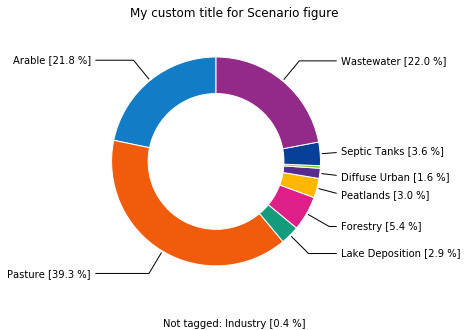

In [9]:
scenario.plot_as_donut(
    file_name='scenario',  # this will save the figure as 'scenario.pdf'
    output_location='.',  # this will save the figure in this directory (current working directory here)
    file_format='pdf',  # this can be 'png', 'pdf', 'jpg', 'svg'
    title_on=True,  # whether the figure should have a title
    custom_title='My custom title for Scenario figure',  # title to display at the top of the figure
    label_display_threshold_percent=1  # threshold in percent below which a source is not directly tagged on plot
)


## Plotting several Scenarios side-by-side

First, let's create a few other 'dummy' Scenarios from the Scenario used above.


In [10]:
scenario2 = SLAMpy.Scenario(name='Scenario2', nutrient='N')
scenario2.loads = scenario.loads * 0.8
scenario2.areas = scenario.areas

scenario3 = SLAMpy.Scenario(name='Scenario3', nutrient='N')
scenario3.loads = scenario.loads * 1.4
scenario3.areas = scenario.areas

Now, let's put them in a ScenarioList, which is another SLAMpy object that allows to gather Scenario objects in a common list. Note, all Scenarios contained in a given ScenarioList must be considering the same nutrient exclusively (either N or P).

In [11]:
scenario_list = SLAMpy.ScenarioList([scenario, scenario2, scenario3])

Finally, use the relevant ScenarioList method to plot them as vertical stacked bars.

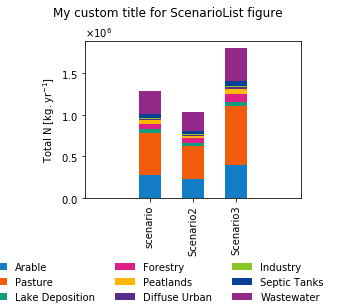

In [12]:
scenario_list.plot_as_stacked_bars(
    file_name='compare_scenarios',  # this will save the figure as 'compare_scenarios.png'
    output_location='.',  # this will save the figure in this directory (current working directory here)
    file_format='png',  # this can be 'png', 'pdf', 'jpg', 'svg'
    title_on=True,  # whether the figure should have a title
    custom_title='My custom title for ScenarioList figure',  # title to display at the top of the figure
    scenario_label_rotation=90, # anti-clockwise rotation in degrees for the x-axis labels
    width=0.1  # width of the stacked bars in points
)